In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

pd.options.display.float_format = '{:.2f}'.format

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print(color.BLUE + 'Read orders_products_classified.pkl file' + color.END)

path = r'C:\\Users\\mutta\\Documents\\Project 4\\' 


ords_prods_merged_pkl = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_grouped.pkl')

df_ords_prods_merged  = pd.read_pickle(ords_prods_merged_pkl)

df_ords_prods_merged.head(10)

Read orders_products_classified.pkl file


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busy_days_of_the_week,busiest_period_of_day,max_order,loyalty_flag,max_product_orders,spending_flag,median_of_frequency,frequency_flag
0,2539329,1,1,2,8,0.00,196,1,0,Soda,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
1,2539329,1,1,2,8,0.00,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
2,2539329,1,1,2,8,0.00,12427,3,0,Original Beef Jerky,...,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
3,2539329,1,1,2,8,0.00,26088,4,0,Aged White Cheddar Popcorn,...,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
4,2539329,1,1,2,8,0.00,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
5,2398795,1,2,3,7,15.00,196,1,1,Soda,...,Mid-range product,Regularly busy,slowest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
6,2398795,1,2,3,7,15.00,10258,2,0,Pistachios,...,Low-range product,Regularly busy,slowest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
7,2398795,1,2,3,7,15.00,12427,3,1,Original Beef Jerky,...,Low-range product,Regularly busy,slowest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
8,2398795,1,2,3,7,15.00,13176,4,0,Bag of Organic Bananas,...,Mid-range product,Regularly busy,slowest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
9,2398795,1,2,3,7,15.00,26088,5,1,Aged White Cheddar Popcorn,...,Low-range product,Regularly busy,slowest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer


Order day of the week bar chart 


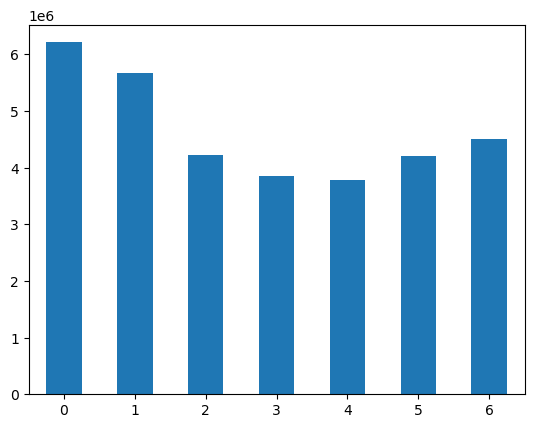

In [3]:
print('Order day of the week bar chart ')

bar = df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(y='Number of orders in a days of the week', rot=0)

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

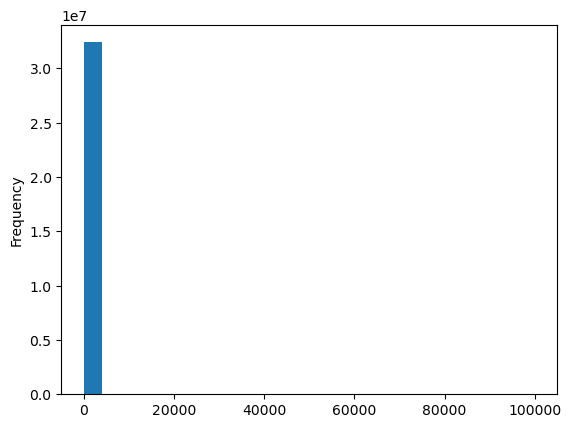

In [4]:
df_ords_prods_merged['prices'].plot.hist(bins = 25)


<Axes: xlabel='prices', ylabel='prices'>

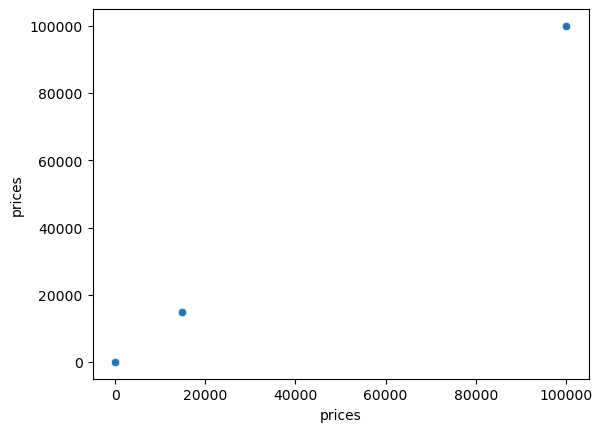

In [5]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged)

From the output there are 5,127 rows with outlier observations (prices greater than $100). In addition, 
at the top of the prices column, there’s another odd value, $14,900.00, which 
corresponds to the second unexplainable point in the scatterplot. Following this is the 
$99,999.00 identified previously. As such, the $14,900.00 and $99,999.00 values that are skewing charts.

In [6]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busy_days_of_the_week,busiest_period_of_day,max_order,loyalty_flag,max_product_orders,spending_flag,median_of_frequency,frequency_flag
1576,912404,17,12,2,14,5.00,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
1638,603376,17,22,6,16,4.00,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
16534,3264360,135,2,2,21,13.00,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular days,Average orders,4,New customer,1154.79,High spender,11.50,Regular customer
16540,892534,135,3,0,8,12.00,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.79,High spender,11.50,Regular customer
53712,229704,342,8,1,19,30.00,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.43,High spender,20.00,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,18,1,9,7.00,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,25,Regular customer,351.14,High spender,6.00,Frequent customer
32377867,2504315,205818,3,5,15,3.00,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular days,Most orders,25,Regular customer,170.07,High spender,11.50,Regular customer
32377877,1108388,205818,5,4,5,1.00,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Least busy,slowest days,Fewest orders,25,Regular customer,170.07,High spender,11.50,Regular customer
32410707,1916142,206049,1,2,17,0.00,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular days,Average orders,5,New customer,938.03,High spender,7.00,Frequent customer


In [7]:
print('Outliers values above 100 price are converted to nan values')

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100, 'prices'] = np.nan

print('After conversion outliers the max value in prices is: ', df_ords_prods_merged['prices'].max() )

Outliers values above 100 price are converted to nan values
After conversion outliers the max value in prices is:  25.0


<Axes: ylabel='Frequency'>

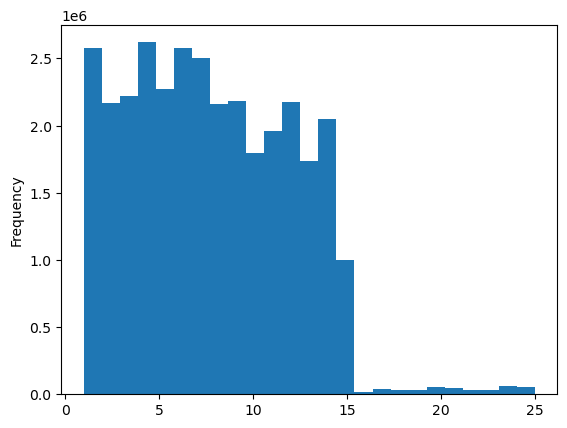

In [8]:
df_ords_prods_merged['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

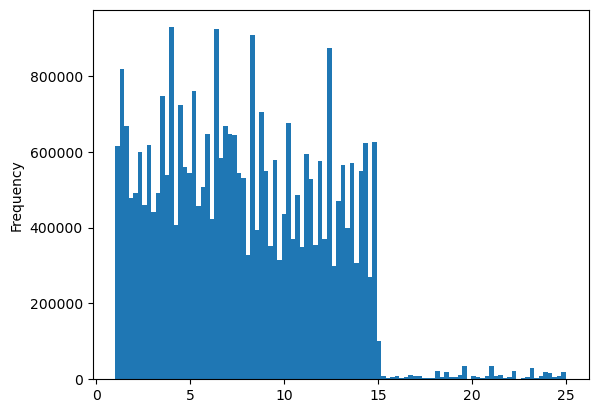

In [9]:
df_ords_prods_merged['prices'].plot.hist(bins = 100)

## Sampling Data

In [10]:
np.random.seed(4)
#create true/false list containing 0.7 are true and 0.3 are false
dev = []
dev = ( np.random.rand(len(df_ords_prods_merged)) <= 0.7 )

#Split the df_ords_prods_merged in ratio of 7:3
df_big = df_ords_prods_merged[dev]
df_small = df_ords_prods_merged[~dev]



In [12]:
print('Varify length')
print('Length of original data frame:' , len(df_ords_prods_merged))
print('Split data frame:', len(df_big), '+', len(df_small) ,'=' , len(df_big) + len(df_small) )

Varify length
Length of original data frame: 32435059
Split data frame: 22705099 + 9729960 = 32435059


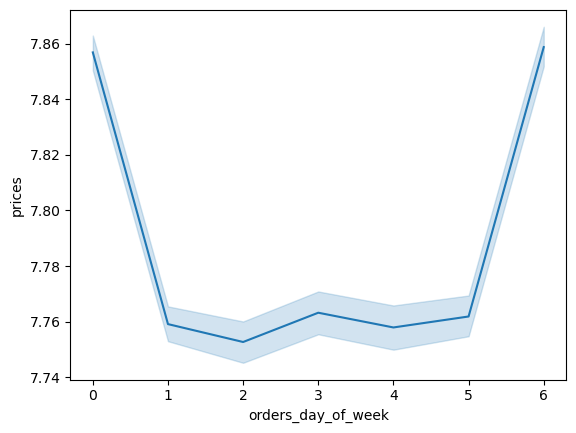

In [15]:
line = sns.lineplot(data = df_small[['orders_day_of_week', 'prices']], x = 'orders_day_of_week',y = 'prices')